# Data preprocessing and descriptive analysis

In [1]:
# Libraries importation
import nltk                                # Python library for NLP
#from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random 
import pandas as pd
import numpy as np

# from functools import reduce
# from operator import add

In [2]:
#! pip install pandas_profiling
#from pandas_profiling import ProfileReport

In [3]:
# Data loading
Afghan_tweets = pd.read_csv('US-Afghan_war_tweets.csv', sep=',')

In [4]:
print("Shape:  {0}".format(Afghan_tweets.shape))
Afghan_tweets.head(10)

Shape:  (362566, 7)


,user_location,date,text,sentiment,polarity,hashtags,source
0,NaN,8/19/2021 23:59,cant recall told troops afghanistan falsely ...,negative,-0.300000,['afghanistan'],twitter for iphone
1,"washington, dc",8/19/2021 23:59,shocker afghanistan taliban carrying doorto do...,neutral,0.000000,['afghanistan'],twitter for ipad
2,NaN,8/19/2021 23:59,drop bass bombs big homie afghanistan talibans,negative,-0.075000,"['afghanistan', 'talibans']",twitter for iphone
3,"midnapore, west bengal, uk outreach",8/19/2021 23:59,burqa prices risen markets afghanistans provin...,negative,-0.250000,['afghanistan'],twitter web app
4,"york, england",8/19/2021 23:59,uk carved afghanistan s heroin minorities mili...,neutral,0.000000,['afghanistan'],twitter for ipad
5,new delhi,8/19/2021 23:59,afghanistan times changed pictures afghan wome...,positive,0.500000,['afghanistan'],twitter for iphone
6,"washington, dc",8/19/2021 23:59,pakistan closed borders refugees afghanistan...,negative,-0.100000,"['pakistan', 'refugees', 'afghanistan']",twitter web app
7,dallas/fort worth,8/19/2021 23:59,rather drawn political blame game believe far ...,positive,0.025000,NaN,twitter for iphone
8,world,8/19/2021 23:59,admit usarmy right invade httpstcojppyqqgm,positive,0.285714,['usarmy'],twitter for android
9,ohio,8/19/2021 23:59,thing think current administration terribl...,negative,-0.500000,NaN,twitter web app


In [5]:
# Number of unique texts
print(len(Afghan_tweets.text.unique()))

359904


In [6]:
# Checking for duplicated tweets
mask_duplicated = Afghan_tweets.duplicated(keep=False)
Afghan_tweets[mask_duplicated]

,user_location,date,text,sentiment,polarity,hashtags,source
11602,"victoria, australia",8/19/2021 16:05,shows desperate peterdutton getting auspol a...,negative,-0.600,"['peterdutton', 'auspol', 'afghanistan', 'morr...",twitter for iphone
11614,"victoria, australia",8/19/2021 16:05,shows desperate peterdutton getting auspol a...,negative,-0.600,"['peterdutton', 'auspol', 'afghanistan', 'morr...",twitter for iphone
20513,"india, delhi, malerkotla",8/19/2021 11:31,best moments pride people afghanistan jai h...,positive,1.000,"['afghanistan', 'afghanistan']",twitter for android
20521,"india, delhi, malerkotla",8/19/2021 11:31,best moments pride people afghanistan jai h...,positive,1.000,"['afghanistan', 'afghanistan']",twitter for android
32683,NaN,8/18/2021 18:45,heartbreaking afghanwomen httpstcoyugzzxfy,neutral,0.000,['afghanwomen'],twitter for android
...,...,...,...,...,...,...,...
332688,"punjab, pakistan",8/15/2021 4:36,fall kabul fall foreign policy biden adminis...,negative,-0.125,"['kabul', 'biden']",twitter web app
333384,"new delhi, india",8/14/2021 23:02,kabul fallen taliban killing political leade...,neutral,0.000,"['kabul', 'afghanistan']",twitter web app
333385,"new delhi, india",8/14/2021 23:02,kabul fallen taliban killing political leade...,neutral,0.000,"['kabul', 'afghanistan']",twitter web app
350887,"new delhi, india",8/16/2021 12:33,help save us afghanwomen,neutral,0.000,['afghanwomen'],twitter for iphone


In [7]:
# Drop duplicates
Afghan_tweets = Afghan_tweets.drop_duplicates().reset_index(drop=True)
# Dataset shape
print("The dataset shape is: ",Afghan_tweets.shape)
# Number of unique texts
print("Number of unique texts: ",len(Afghan_tweets.text.unique()))

The dataset shape is:  (361544, 7)
Number of unique texts:  359904


In [8]:
# Checking for possible duplicated texts
mask_duplicated = Afghan_tweets[['text','date','hashtags']].duplicated(keep=False)
Afghan_tweets[mask_duplicated]

,user_location,date,text,sentiment,polarity,hashtags,source
42108,"blainville, quãâ©bec",8/18/2021 16:49,al jazeera forces fire tear gas rubber bullets...,positive,0.214286,"['kabul', 'afghanistan']",twitter for iphone
42112,us,8/18/2021 16:49,al jazeera forces fire tear gas rubber bullets...,positive,0.214286,"['kabul', 'afghanistan']",twitter for iphone
214421,northwest indiana,8/16/2021 20:18,i pass responsibility fifth president afghan...,neutral,0.000000,['afghanistan'],twitter for iphone
214532,"new york, ny",8/16/2021 20:18,i pass responsibility fifth president afghan...,neutral,0.000000,['afghanistan'],twitter for iphone
227200,"barrie, ontario",8/16/2021 17:46,pray afghanistan,neutral,0.000000,['afghanistan'],twitter for android
227205,anxiety cage,8/16/2021 17:46,pray afghanistan,neutral,0.000000,['afghanistan'],twitter for iphone
296389,"chittagong, bangladesh",8/15/2021 22:07,game finish beat called super power kabul af...,negative,-0.033333,"['kabul', 'afghanistan']",twitter for android
296403,"jaipur, india",8/15/2021 22:07,game finish beat called super power kabul af...,negative,-0.033333,"['kabul', 'afghanistan']",twitter for iphone


In [9]:
# Drop duplicates
Afghan_tweets = Afghan_tweets[[not condition for condition in mask_duplicated]]
# Dataset shape
print("The dataset shape is: ",Afghan_tweets.shape)

The dataset shape is:  (361536, 7)


In [10]:
# Missing values
print('The perc. of empty values')
for column_name in Afghan_tweets:
    percentage_na = Afghan_tweets[column_name].isna().mean() * 100
    print(f'{column_name} : {np.round(percentage_na,5)} %')

The perc. of empty values
user_location : 27.7007 %
date : 0.00028 %
text : 0.00028 %
sentiment : 0.0 %
polarity : 0.0 %
hashtags : 23.88725 %
source : 0.00111 %


In [11]:
# Drop some rows with missing values
# identify the rows with NaN in date and text
mask_date_text_na = (
    Afghan_tweets.date.isna().values 
    | Afghan_tweets.text.isna().values
)
Afghan_tweets = Afghan_tweets[~mask_date_text_na].reset_index(drop=True)

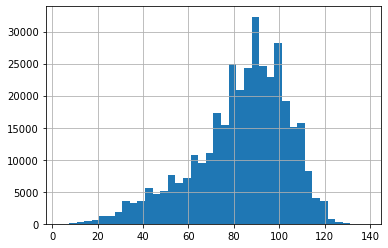

In [12]:
# Text lenght distribution
Afghan_tweets['text'].dropna().apply(len).hist(bins=40)
plt.show()

sentiment
negative    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
neutral     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
positive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

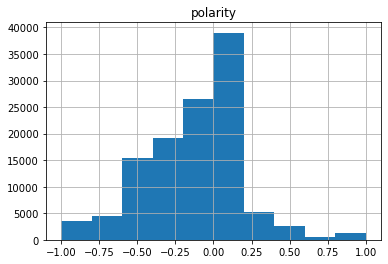

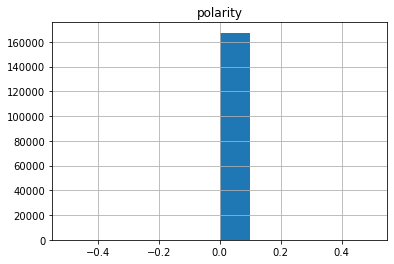

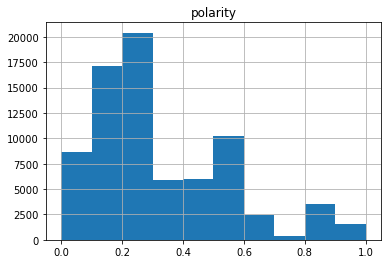

In [13]:
Afghan_tweets.groupby(Afghan_tweets.sentiment).hist()

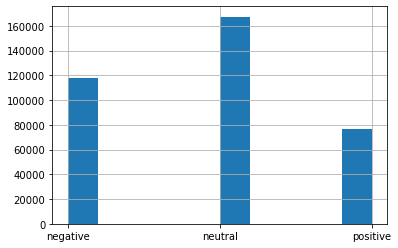

In [14]:
Afghan_tweets.sentiment.hist()
plt.show()

In [15]:
# profile = ProfileReport(df, title="Sentiment analysis", html={"style": {"full_width": True}})
# profile.to_notebook_iframe()

In [16]:
# Sort by date
Afghan_tweets.sort_values('date',ascending=False)

,user_location,date,text,sentiment,polarity,hashtags,source
270516,1/22/2010 14:01,['afghanistan'],tweeted times,neutral,0.0,FALSE,NaN
134668,4/5/2010 13:21,['afghanistan'],twitter android,negative,0.0,FALSE,NaN
23069,leeds,8/19/2021 9:59,knew taliban start people shoot kabul looters ...,neutral,0.0,NaN,twitter for iphone
23081,"nairobi, kenya",8/19/2021 9:59,julian assange speaking the goal use afghanis...,neutral,0.0,NaN,twitter for android
39023,"pune, india",8/19/2021 9:59,guess airport picture looks like pune airport...,neutral,0.0,"['airport', 'pune', 'kabul']",tweetdeck
...,...,...,...,...,...,...,...
358198,"karachi, pakistan",8/11/2021 0:09,today column afghan people us b bombing writte...,neutral,0.0,"['afghan', 'us', 'b52']",twitter for android
358199,kanata,8/11/2021 0:08,taliban seizes eighth afghan provincial capita...,negative,-0.3,"['afghan', 'war']",twitter for android
201151,"karachi, pakistan",8/11/2021 0:06,look closely negotiations agreements talib...,negative,0.0,NaN,twitter for android
201152,"luton, england",8/11/2021 0:04,americans negotiated taliban tapi pipeline...,positive,0.2,['taliban'],twitter for android


In [17]:
# Drop incorrect data
Afghan_tweets = Afghan_tweets[Afghan_tweets.date != "['afghanistan']"]
Afghan_tweets.sort_values('date',ascending=False)

,user_location,date,text,sentiment,polarity,hashtags,source
23069,leeds,8/19/2021 9:59,knew taliban start people shoot kabul looters ...,neutral,0.0,NaN,twitter for iphone
23080,NaN,8/19/2021 9:59,peoples faith publicinquiry sort questions...,neutral,0.0,['publicinquiry'],twitter for ipad
39023,"pune, india",8/19/2021 9:59,guess airport picture looks like pune airport...,neutral,0.0,"['airport', 'pune', 'kabul']",tweetdeck
39022,NaN,8/19/2021 9:59,panjshirresistance againstthetaliban afghanist...,neutral,0.0,"['panjshirresistance', 'againstthetaliban', 'a...",twitter web app
39021,quetta pakistan,8/19/2021 9:59,westerners r afraid terrorism afgbut r concern...,negative,-0.6,"['terrorism', 'islamic']",twitter for android
...,...,...,...,...,...,...,...
358198,"karachi, pakistan",8/11/2021 0:09,today column afghan people us b bombing writte...,neutral,0.0,"['afghan', 'us', 'b52']",twitter for android
358199,kanata,8/11/2021 0:08,taliban seizes eighth afghan provincial capita...,negative,-0.3,"['afghan', 'war']",twitter for android
201151,"karachi, pakistan",8/11/2021 0:06,look closely negotiations agreements talib...,negative,0.0,NaN,twitter for android
201152,"luton, england",8/11/2021 0:04,americans negotiated taliban tapi pipeline...,positive,0.2,['taliban'],twitter for android


In [18]:
# date column type
Afghan_tweets.date.dtypes

dtype('O')

In [19]:
# Convert to date 
Afghan_tweets.date = pd.to_datetime(Afghan_tweets.date)

In [20]:
# Day, hour variables creation
Afghan_tweets['day'] = Afghan_tweets.date.dt.day
Afghan_tweets['hour'] = Afghan_tweets.date.dt.hour
Afghan_tweets["Day-Hour"] = Afghan_tweets['day'].map(str).str.cat(others=[Afghan_tweets['hour'].map(str)], sep='-')
Afghan_tweets.head()

,user_location,date,text,sentiment,polarity,hashtags,source,day,hour,Day-Hour
0,NaN,2021-08-19 23:59:00,cant recall told troops afghanistan falsely ...,negative,-0.300,['afghanistan'],twitter for iphone,19,23,19-23
1,"washington, dc",2021-08-19 23:59:00,shocker afghanistan taliban carrying doorto do...,neutral,0.000,['afghanistan'],twitter for ipad,19,23,19-23
2,NaN,2021-08-19 23:59:00,drop bass bombs big homie afghanistan talibans,negative,-0.075,"['afghanistan', 'talibans']",twitter for iphone,19,23,19-23
3,"midnapore, west bengal, uk outreach",2021-08-19 23:59:00,burqa prices risen markets afghanistans provin...,negative,-0.250,['afghanistan'],twitter web app,19,23,19-23
4,"york, england",2021-08-19 23:59:00,uk carved afghanistan s heroin minorities mili...,neutral,0.000,['afghanistan'],twitter for ipad,19,23,19-23


In [58]:
# Number of tweets per hour
import collections
d = dict(Afghan_tweets["Day-Hour"].value_counts())
od = collections.OrderedDict(sorted(d.items()))
# Number of positive tweets per hour
d = dict(Afghan_tweets[Afghan_tweets.sentiment == 'positive']["Day-Hour"].value_counts())
od_p = collections.OrderedDict(sorted(d.items()))
# Number of negative tweets per hour
d = dict(Afghan_tweets[Afghan_tweets.sentiment == 'negative']["Day-Hour"].value_counts())
od_n = collections.OrderedDict(sorted(d.items()))

In [31]:
days = [i for i in range(11,20)]
hours = [i for i in range(0,24)]

In [63]:
tweets_per_hours = {}
pos_tweets_per_hours = {}
neg_tweets_per_hours = {}
for day in days:
    for hour in hours:
        if str(day)+"-"+str(hour) not in od.keys():
            tweets_per_hours[str(day)+"-"+str(hour)] = 0
        else:
            tweets_per_hours[str(day)+"-"+str(hour)] = od[str(day)+"-"+str(hour)]
        if str(day)+"-"+str(hour) not in od_p.keys():
            pos_tweets_per_hours[str(day)+"-"+str(hour)] = 0
        else:
            pos_tweets_per_hours[str(day)+"-"+str(hour)] = od_p[str(day)+"-"+str(hour)]
        if str(day)+"-"+str(hour) not in od_n.keys():
            neg_tweets_per_hours[str(day)+"-"+str(hour)] = 0
        else:
            neg_tweets_per_hours[str(day)+"-"+str(hour)] = od_n[str(day)+"-"+str(hour)]
print(neg_tweets_per_hours)

{'11-0': 27, '11-1': 59, '11-2': 60, '11-3': 87, '11-4': 73, '11-5': 106, '11-6': 131, '11-7': 139, '11-8': 132, '11-9': 133, '11-10': 116, '11-11': 162, '11-12': 173, '11-13': 165, '11-14': 175, '11-15': 182, '11-16': 150, '11-17': 149, '11-18': 108, '11-19': 118, '11-20': 87, '11-21': 97, '11-22': 67, '11-23': 50, '12-0': 37, '12-1': 42, '12-2': 62, '12-3': 87, '12-4': 108, '12-5': 126, '12-6': 150, '12-7': 175, '12-8': 143, '12-9': 166, '12-10': 215, '12-11': 206, '12-12': 199, '12-13': 171, '12-14': 59, '12-15': 47, '12-16': 54, '12-17': 54, '12-18': 71, '12-19': 72, '12-20': 55, '12-21': 71, '12-22': 58, '12-23': 31, '13-0': 17, '13-1': 39, '13-2': 38, '13-3': 37, '13-4': 68, '13-5': 62, '13-6': 70, '13-7': 96, '13-8': 78, '13-9': 93, '13-10': 91, '13-11': 118, '13-12': 133, '13-13': 124, '13-14': 108, '13-15': 120, '13-16': 88, '13-17': 107, '13-18': 136, '13-19': 76, '13-20': 85, '13-21': 83, '13-22': 49, '13-23': 44, '14-0': 50, '14-1': 55, '14-2': 57, '14-3': 166, '14-4': 290,

In [65]:
def Plot_tweet_evolution(tweetdic, title = "Tweets evolution"):
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (15, 6)

    fig, ax = plt.subplots()

    ax.bar(
        x=list(tweetdic.keys()),
        height=list(tweetdic.values())
    )

    # First, let's remove the top, right and left spines (figure borders)
    # which really aren't necessary for a bar chart.
    # Also, make the bottom spine gray instead of black.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax.tick_params(bottom=False, left=False)

    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Axis names and text orientation
    ax.set_xlabel('Day-Hour')
    ax.set_ylabel('Tweets')
    xticks = [str(i).split('-')[0]+'/08' if '-0' in str(i) else '' for i in tweets_per_hours.keys()]
    plt.xticks(list(tweetdic.keys()),xticks)
    plt.xticks(rotation=45)
    plt.title("Tweet evolution")
    # Make the chart fill out the figure better.
    fig.tight_layout()

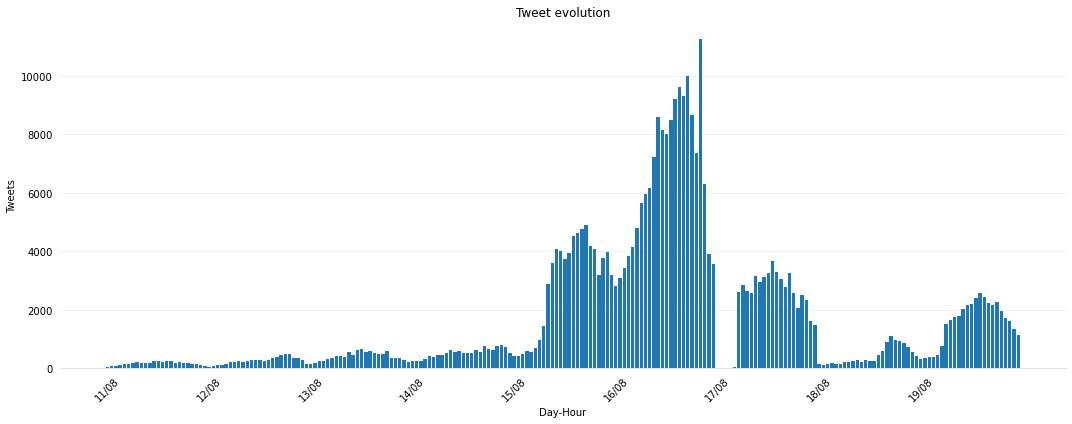

In [66]:
Plot_tweet_evolution(tweets_per_hours)

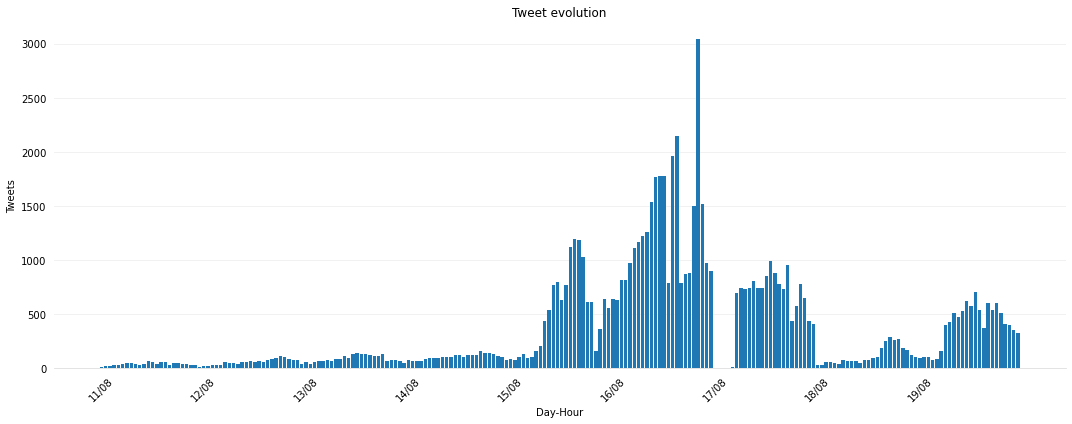

In [68]:
Plot_tweet_evolution(pos_tweets_per_hours,"Positive tweets evolution")

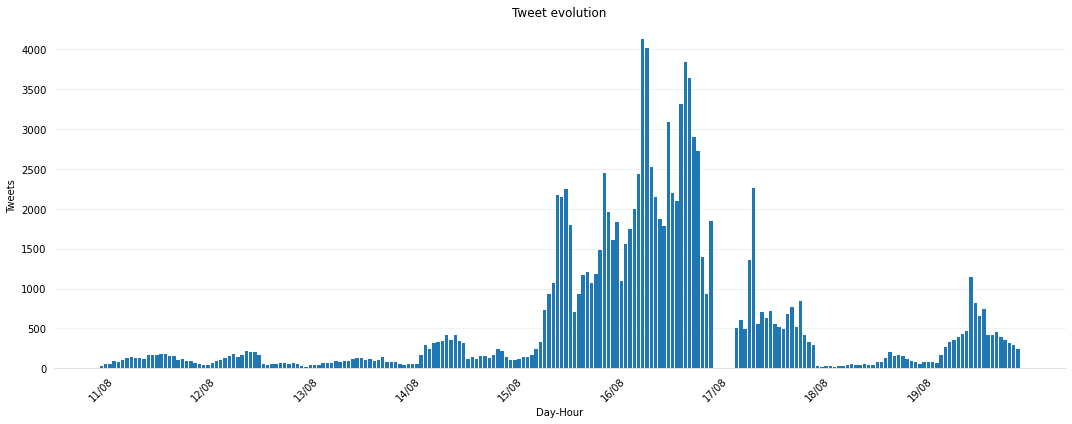

In [70]:
Plot_tweet_evolution(neg_tweets_per_hours,"Negative tweets evolution")

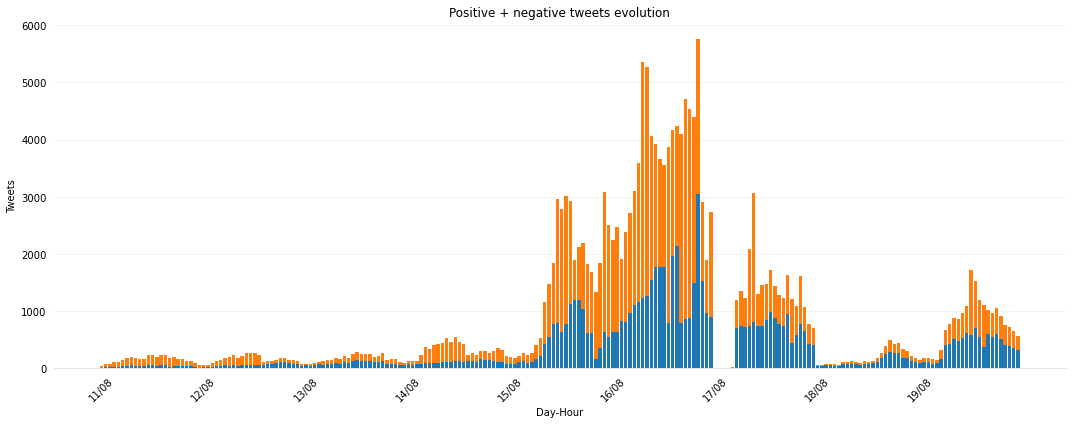

In [72]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (15, 6)
fig, ax = plt.subplots()

ax.bar(
    x=list(tweets_per_hours.keys()),
    height=list(pos_tweets_per_hours.values())
)
ax.bar(
    x=list(tweets_per_hours.keys()),
    height=list(neg_tweets_per_hours.values()),
    bottom=list(pos_tweets_per_hours.values())
)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Axis names and text orientation
ax.set_xlabel('Day-Hour')
ax.set_ylabel('Tweets')
xticks = [str(i).split('-')[0]+'/08' if '-0' in str(i) else '' for i in tweets_per_hours.keys()]
plt.xticks(list(tweets_per_hours.keys()),xticks)
plt.xticks(rotation=45)
plt.title("Positive + negative tweets evolution")
# Make the chart fill out the figure better.
fig.tight_layout()

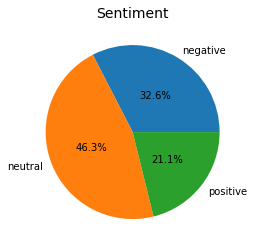

In [80]:
# Overall sentiment
pie, ax = plt.subplots(figsize=[8,4])
plt.pie(x=Afghan_tweets.groupby("sentiment")["sentiment"].count(), autopct="%.1f%%",
        labels=Afghan_tweets.groupby("sentiment")["sentiment"].count().index, pctdistance=0.5)
plt.title("Sentiment", fontsize=14)
plt.show()

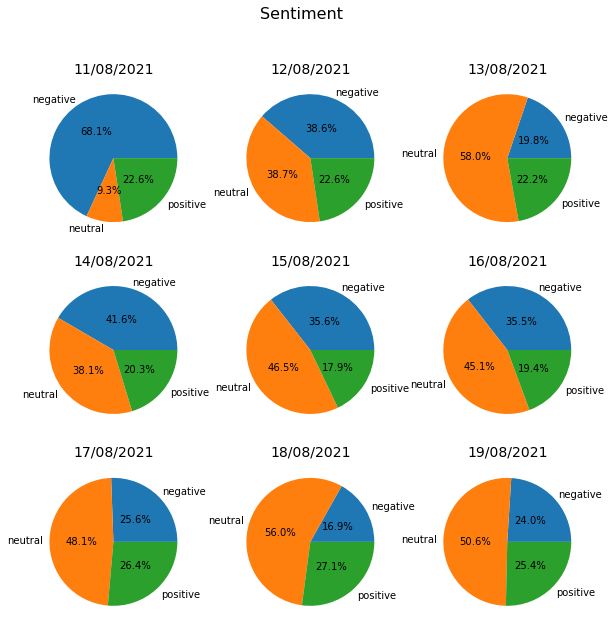

In [83]:
pie, axes = plt.subplots(3,3,figsize=[10,10])
pie.suptitle('Sentiment', fontsize=16)
axes = axes.flatten()
for axe,day in zip(axes,days):
    axe.pie(x=Afghan_tweets[Afghan_tweets.day==day].groupby("sentiment")["sentiment"].count(), autopct="%.1f%%", 
            labels=Afghan_tweets[Afghan_tweets.day==day].groupby("sentiment")["sentiment"].count().index, pctdistance=0.5)
    axe.set_title(str(day)+"/08/2021", fontsize=14)
plt.show()